<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-murasakiw/blob/main/Semana7_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ciencia y Analítica de Datos 
___ 
Semana 6: Data Analysis with Python (IBM)
Nombre: Sergio Omar Esparza Hernández
Matrícula: A01794338

Módulo 4 - Model Development

Un modelo es una ecuación matemática utilizada para predecir un valor de salida a partir de otros valores de entrada.
Sirve para relacionar una o más variables independientes con variables dependientes.
Usualmente, mientras más datos relevantes se tengan, más preciso es el modelo.
Se pueden probar diferentes tipos de modelos para ver con cuál se obtienen mejores resultados.


##Linear Regression and Multiple Linear Regression

La regresión lineal utiliza una sola variable para hacer una predicción.
La regresión lineal múltiple toma varias variables independientes para hacer una predicción.

La regresión lineal simple ayuda a entender la relación entre una variable llamada predictor y una variable objetivo.

Se utilizan los datos obtenidos para ajustar el modelo. El resultado de los datos de entrenamiento son los parámetros del modelo.
El proceso es el siguiente:
Se tiene un conjunto de datos.
Se utilizan estos datos para entrenar o ajustar el modelo.
Se utiliza el modelo para predecir valores.
Los valores predichos se comparan con los valores esperados para obtener una medida del desempeño del modelo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

df = pd.read_csv(url, header =  None)

In [3]:
headers = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 
           'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
           'wheel_base', 'length', 'width', 'height', 'curb_weight', 
           'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 
           'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
           'city_mpg', 'highway_mpg', 'price']
df.columns = headers

Entrenamiento de un modelo de regresión lineal simple.

In [4]:
from sklearn.linear_model import LinearRegression

Crear objeto linear regression.

In [5]:
lm = LinearRegression()

Se definen las variables de entrada y salida

In [8]:
df.replace('?', np.nan, inplace=True)
df['price'] = pd.to_numeric(df['price'])
media = np.mean(df.price)
df['price'] = df['price'].replace(np.nan, media)

In [9]:
X=df[['highway_mpg']]
Y=df['price']

Se utiliza el método fit para entrenar el modelo.

In [10]:
lm.fit(X,Y)

LinearRegression()

Se pueden obtener las predicciones utilizando el método predict

In [11]:
yhat = lm.predict(X)

b0 es un atributo del objeto lm

In [12]:
lm.intercept_

37470.66014138312

b1 es un atributo del objeto lm

In [13]:
lm.coef_

array([-789.02661986])

In [ ]:
# price=b0+b1*highway-mpg

El modelo de regresión lineal múltiple es utilizado para encontrar la relación entre una variable continua objetivo(Y) y dos o más variables de entrada (X).

Entrenamiento de un modelo de regresión lineal múltiple.

In [14]:
df.replace('?', np.nan, inplace=True)
df['horsepower'] = pd.to_numeric(df['horsepower'])
media = np.mean(df.horsepower)
df['horsepower'] = df['horsepower'].replace(np.nan, media)

In [15]:
df['curb_weight'] = pd.to_numeric(df['curb_weight'])
media = np.mean(df.curb_weight)
df['curb_weight'] = df['curb_weight'].replace(np.nan, media)

In [16]:
df['engine_size'] = pd.to_numeric(df['engine_size'])
media = np.mean(df.engine_size)
df['engine_size'] = df['engine_size'].replace(np.nan, media)

In [17]:
df['highway_mpg'] = pd.to_numeric(df['highway_mpg'])
media = np.mean(df.highway_mpg)
df['highway_mpg'] = df['highway_mpg'].replace(np.nan, media)

In [18]:
z=df[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']]

In [19]:
lm.fit(z, df['price'])

LinearRegression()

Se pueden obtener las predicciones del modelo con él método predict.

In [20]:
yhat = lm.predict(z)

Se puede obtener el valor de b0 como atributo del objeto lm

In [21]:
lm.intercept_

-9239.379970934518

Los coeficientes del modelo se obtienen con el atributo coef_ del objeto lm.

In [22]:
lm.coef_ #Coeficientes del modelo multilineal

array([ 18.12178086,   3.80596513, 101.121117  , -65.10968116])

##Model Evaluation using visualization.

Regression Plot  
Proporciona información de la relación entre dos variables.
La magnitud de la correlación.
La dirección de la relación (positiva o negativa).
Cada punto representa un valor de la variable de salida.
La línea recta representa los valores predichos por el modelo.

In [23]:
import seaborn as sns

(0.0, 48120.551383773745)

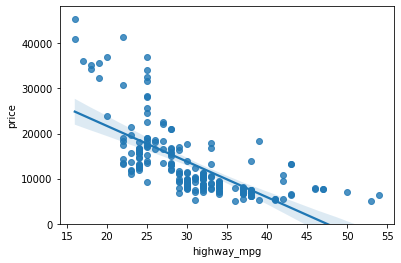

In [24]:
sns.regplot(x='highway_mpg', y='price', data=df)
plt.ylim(0,)

Residual plot  
Representa el error entre los valores esperados y los valores predichos por el modelo.
Se espera que estos valores tengan de media cero, distribuidos uniformemente a lo largo del eje x con varianza similar y sin curvatura.

Esta gráfica ayuda a visualizar si el modelo seleccionado es incorrecto.

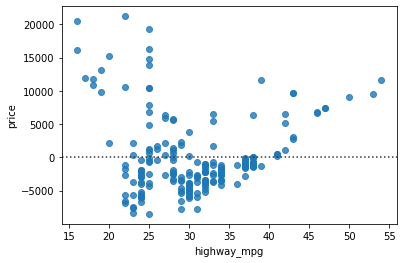

In [27]:
sns.residplot(x=df['highway_mpg'], y=df['price'])

Distribution plot  
Compara los valores predichos con los valores reales.
Útil para visualizar modelos con varias variables independientes.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


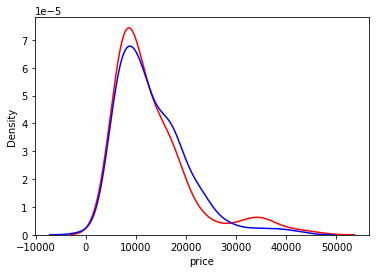

In [30]:
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(yhat, hist=False, color='b', label='Fitted Values', ax=ax1)

##Polynomial Regression and Pipelines


Se transforman los datos en un polinomio, después se utiliza la regresión lineal para ajustar los parámetros del modelo.  
Útil para describir relaciones curvilíneas. El grado de la regresión tiene mucho impacto y puede resultar en un mejor entrenamiento del modelo.

La función polyfit se utiliza para generar un modelo polinómico.

In [73]:
x = df['highway_mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.641 x + 213.4 x - 9226 x + 1.402e+05


Para realizar una regresión lineal múltiple polinomial es necesario utilizar la librería preprocessing de scikit-learn.

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# pr = PolynomialFeatures(degree=2, include_bias=False)
# x_polly = pr.fit_transform(x[['horsepower', 'curb_weight']])

El módulo preprocessing se puede utilizar para aplicar transformaciones a los datos antes de utilizarlos para entrenar el modelo.

In [32]:
from sklearn.preprocessing import StandardScaler

In [40]:
x_data = df.copy()

In [41]:
x_data

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400,23,28,16845.0
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300,19,25,19045.0
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500,18,23,21485.0
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800,26,27,22470.0


In [42]:
scale = StandardScaler()
scale.fit(x_data[['horsepower', 'highway_mpg']])

StandardScaler()

In [43]:
x_scale = scale.transform(x_data[['horsepower', 'highway_mpg']])

In [46]:
pd.DataFrame(x_scale, columns=['horsepower', 'highway_mpg']).describe()

,horsepower,highway_mpg
count,2.050000e+02,2.050000e+02
mean,2.274603e-16,1.473076e-16
std,1.002448e+00,1.002448e+00
min,-1.426999e+00,-2.147310e+00
25%,-8.689449e-01,-8.371954e-01
50%,-2.347926e-01,-1.093538e-01
75%,2.978954e-01,4.729195e-01
max,4.660863e+00,3.384286e+00


Los pipelines ayudan a simplificar el código, ya que los pasos necesarios para realizar una predicción a partir de un modelo son varios.  
Los pipelines ejecutan una serie de transformaciones.

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [53]:
#Se crea una lista de tuplas con los pasos a ejecutar
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model', LinearRegression())] 

In [54]:
pipe = Pipeline(input)

In [57]:
pipe.fit(df[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']], df['price']) #Se puede entrenar el pipeline

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [58]:
yhat=pipe.predict(df[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']]) #Se pueden predecir los valores utilizando el método predict del pipeline

##Measures for In-Sample Evaluation

Son formas útiles para determinar numéricamente qué tan bien el modelo se ajusta al conjunto de datos.

Dos métricas importantes para determinar qué tan bueno es el ajuste del modelo son:  
*  Error cuadrático medio. (MSE)
*  R-squared (R^2)

In [59]:
from sklearn.metrics import mean_squared_error

La función recibe dos parámetros, estos son:  
*  Los valores esperados
*  Los valores observados

In [60]:
mean_squared_error(df['price'], yhat)

10282167.881555859

Coeficiente de determinación R^2.  
Métrica para determinar qué tan cerca están los datos a la regresión lineal obtenida.  
El porcentaje de variación de la variable objetivo (Y) que es explicado por el modelo lineal.  
Un valor cercano a 1 indica que el modelo es una buena aproximación de los datos.

In [61]:
X = df[['highway_mpg']]
Y = df['price']
lm = LinearRegression(fit_intercept=True)
lm.fit(X,Y)

LinearRegression()

In [62]:
lm.score(X,Y) #Valor del coeficiente de determinación obtenido del método score del objeto de regresión lineal

0.47682578947968446

##Prediction and Decision Making

Para decidir si un modelo es bueno se puede realizar lo siguiente:
*  Verificar si los valores predichos tienen sentido.
*  Visualizar los resultados.  
*  Utilizar métricas para la evaluación.
*  Comparar modelos.

In [65]:
lm.fit(df[['highway_mpg']], df['price'])

LinearRegression()

Verificar los valores obtenidos de la predicción para ver si con coherentes.

In [67]:
lm.coef_ #El valor de los coeficientes también proporciona información relevante sobre la obtención de un buen modelo.

array([-789.02661986])

In [69]:
import numpy as np
new_input = np.arange(1, 101, 1).reshape(-1, 1)#Generar una lista de valores del 1 al 100 de 1 en 1


In [70]:
yhat = lm.predict(new_input)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [71]:
yhat #Varios valores son negativos entonces no son coherentes.

array([ 36681.63352153,  35892.60690167,  35103.58028182,  34314.55366196,
        33525.5270421 ,  32736.50042225,  31947.47380239,  31158.44718254,
        30369.42056268,  29580.39394283,  28791.36732297,  28002.34070311,
        27213.31408326,  26424.2874634 ,  25635.26084355,  24846.23422369,
        24057.20760384,  23268.18098398,  22479.15436412,  21690.12774427,
        20901.10112441,  20112.07450456,  19323.0478847 ,  18534.02126485,
        17744.99464499,  16955.96802513,  16166.94140528,  15377.91478542,
        14588.88816557,  13799.86154571,  13010.83492586,  12221.808306  ,
        11432.78168614,  10643.75506629,   9854.72844643,   9065.70182658,
         8276.67520672,   7487.64858686,   6698.62196701,   5909.59534715,
         5120.5687273 ,   4331.54210744,   3542.51548759,   2753.48886773,
         1964.46224787,   1175.43562802,    386.40900816,   -402.61761169,
        -1191.64423155,  -1980.6708514 ,  -2769.69747126,  -3558.72409112,
        -4347.75071097,  

Evidencia de progreso del curso.

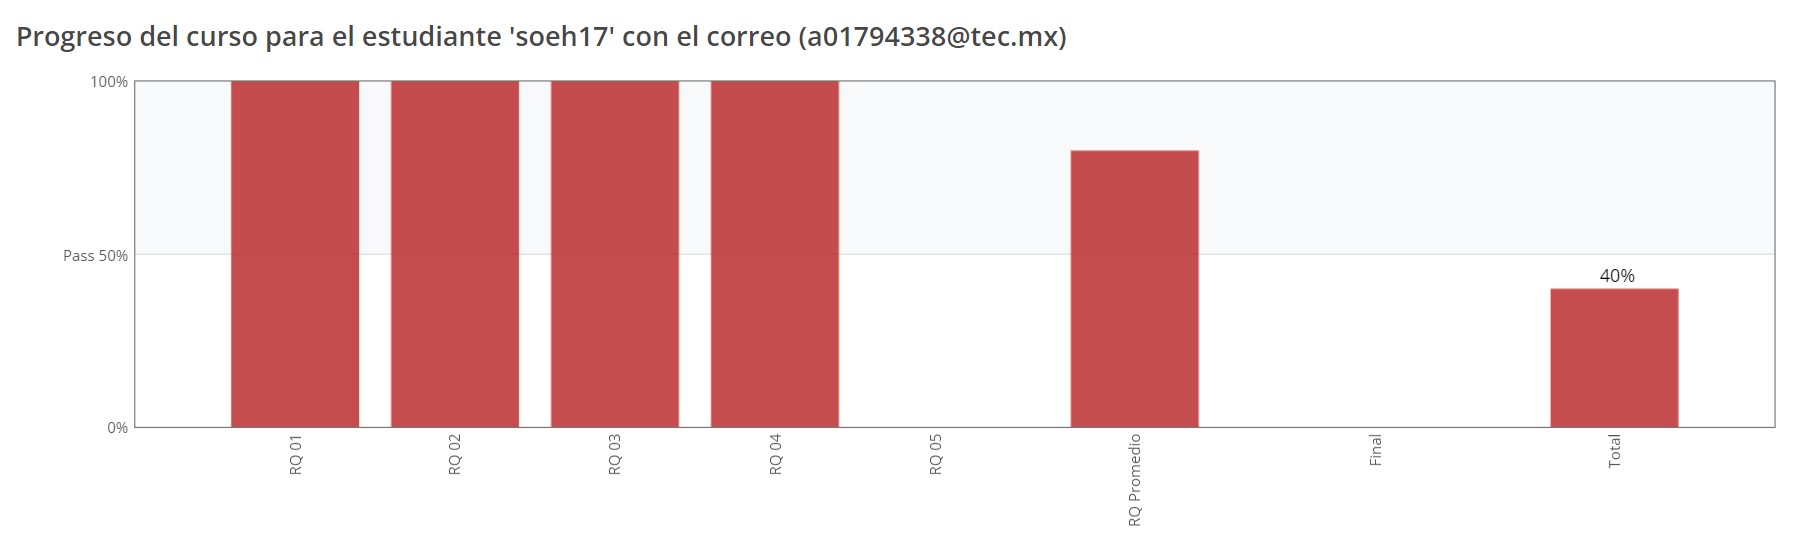